         a      b      c      d       e      f  O
0    63.03  22.55  39.61  40.48   98.67  -0.25  1
1    39.06  10.06  25.02  29.00  114.41   4.56  1
2    68.83  22.22  50.09  46.61  105.99  -3.53  1
3    69.30  24.65  44.31  44.64  101.87  11.21  1
4    49.71   9.65  28.32  40.06  108.17   7.92  1
..     ...    ...    ...    ...     ...    ... ..
205  67.29  16.72  51.00  50.57  137.59   4.96  0
206  51.33  13.63  33.26  37.69  131.31   1.79  0
207  65.76  13.21  44.00  52.55  129.39  -1.98  0
208  40.41  -1.33  30.98  41.74  119.34  -6.17  0
209  48.80  18.02  52.00  30.78  139.15  10.44  0

[210 rows x 7 columns]
        a      b       c      d       e       f  O
0   69.56  15.40   74.44  54.16  105.07   29.70  1
1   89.50  48.90   72.00  40.60  134.63  118.35  1
2   85.29  18.28  100.74  67.01  110.66   58.88  1
3   60.63  20.60   64.54  40.03  117.23  104.86  1
4   60.04  14.31   58.04  45.73  105.13   30.41  1
..    ...    ...     ...    ...     ...     ... ..
95  47.90  13.62   

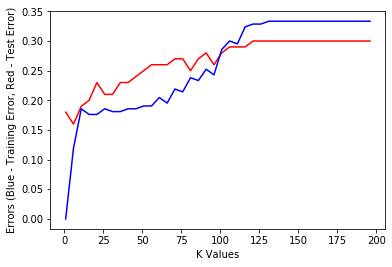

"\nFor Mahalanobis distance metric, an optimal K can be obtained from the curves and the error\nvectors.\nk=6 gives good results\n\nk=6 has\nTest error 0.16\nTraining error 0.119\n\nThus we'll take k*=6 \n\n\n\n"

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 18 21:19:29 2020

@author: DHRUV
"""

"""
HW1 1(d)
i. C.

"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as lrn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df_train=pd.read_csv('TrainingData.csv',index_col=0)
print(df_train)

df_test=pd.read_csv('TestData.csv',index_col=0)
print(df_test)
X=df_train.drop(columns=['O'])
y=df_train['O']
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X)})
knn.fit(X,y)
Z=df_test.drop(columns=['O'])
test_prediction = knn.predict(Z)
print(test_prediction)
U=df_train.drop(columns=['O'])
train_prediction = knn.predict(U)
print(train_prediction)


"""
This code performs KNN (mahalanobis Distance Metric) as p=infinite

"""

test=np.arange(100)
train=np.arange(210)

p=0
q=0


test_y = df_test['O'].to_numpy()
train_y=df_train['O'].to_numpy()

print(test_y)
print(train_y)

for i in test:
    if test_y[i] != test_prediction[i]:
        p=p+1

for f in train:
    if train_y[f] != train_prediction[f]:
        q=q+1

print(p)
print(q)

test_error=p/100
train_error=q/210

print(test_error)
print(train_error)

"""
p are the test prediction mismatches
q are the training prediction mismatches

test_error and train_error are, respectively, the test error and the training error

All this is only for k=5 for Mahalanobis

"""

k = np.arange(1,197,5)
print(k)

size_k = np.size(k)
print(size_k)

ite=np.arange(size_k)
print(ite)

Test_Error_Vector = np.empty([size_k])
Train_Error_Vector = np.empty([size_k])

for h in ite:
    knn = KNeighborsClassifier(n_neighbors=k[h],weights='uniform',algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X)})
    knn.fit(X,y)
    test_prediction = knn.predict(Z)
    train_prediction = knn.predict(U)
    t=0
    q=0
    p=0
    q=0 
    for t in test:
        if test_y[t] != test_prediction[t]:
            p=p+1
    for r in train:
        if train_y[r] != train_prediction[r]:
            q=q+1
    Test_Error_Vector[h]=(p/100)
    Train_Error_Vector[h]=(q/210)
        

print(Test_Error_Vector)
print(Train_Error_Vector)

plt.plot(k,Test_Error_Vector,'r')
plt.plot(k,Train_Error_Vector,'b')
plt.xlabel("K Values")
plt.ylabel("Errors (Blue - Training Error, Red - Test Error)")
plt.show()

"""
For Mahalanobis distance metric, an optimal K can be obtained from the curves and the error
vectors.
k=6 gives good results

k=6 has
Test error 0.16
Training error 0.119

Thus we'll take k*=6 



"""







